<a href="https://colab.research.google.com/github/ysnlakshmi/21-Day-Project/blob/main/Project-6-Time%20Series%20Analysis%20%26%20Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 6: Time Series Analysis & Forecasting 📈

**Project Objective:** To build a time series model to forecast the number of airline passengers for future months. This project provides a comprehensive, step-by-step guide to time series analysis, from data decomposition and stationarity testing to building and evaluating ARIMA and SARIMA models.


### Core Concepts We'll Cover:
1.  **Time Series Fundamentals:** Understanding the components of a time series (Trend, Seasonality, Residuals).
2.  **Stationarity:** Learning what stationarity is, why it's crucial for many models, and how to test for it (Augmented Dickey-Fuller test).
3.  **Data Transformation:** Applying techniques like differencing and log transforms to make a series stationary.
4.  **Model Identification:** Using Autocorrelation (ACF) and Partial Autocorrelation (PACF) plots to determine model parameters.
5.  **ARIMA Modeling:** Building a baseline ARIMA model for forecasting.
6.  **SARIMA Modeling:** Extending ARIMA to build a powerful SARIMA model that explicitly handles seasonality.
7.  **Forecasting & Evaluation:** Making predictions and evaluating model performance.

### **Theoretical Concept: What is a Time Series?**

A time series is a sequence of data points collected or recorded at specific time intervals (e.g., daily, monthly, yearly). Unlike other datasets we've worked with, the order of data points in a time series is critical.

A time series can be broken down into several components:
1.  **Trend:** The long-term upward or downward movement in the data.
2.  **Seasonality:** A repeating, predictable pattern over a fixed period (e.g., sales are higher every December).
3.  **Cyclical Component:** Patterns that occur at irregular, non-fixed intervals (e.g., business cycles). This is often harder to model and is sometimes combined with the trend.
4.  **Residuals (or Noise):** The random, irregular fluctuations that are left over after the other components have been removed.



### Step 1: Setup - Importing Libraries and Loading Data

In [ ]:
pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Set plot style and size
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 4.49 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/airline_passenger_timeseries.csv')
df.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### Step 2: Exploratory Data Analysis & Decomposition

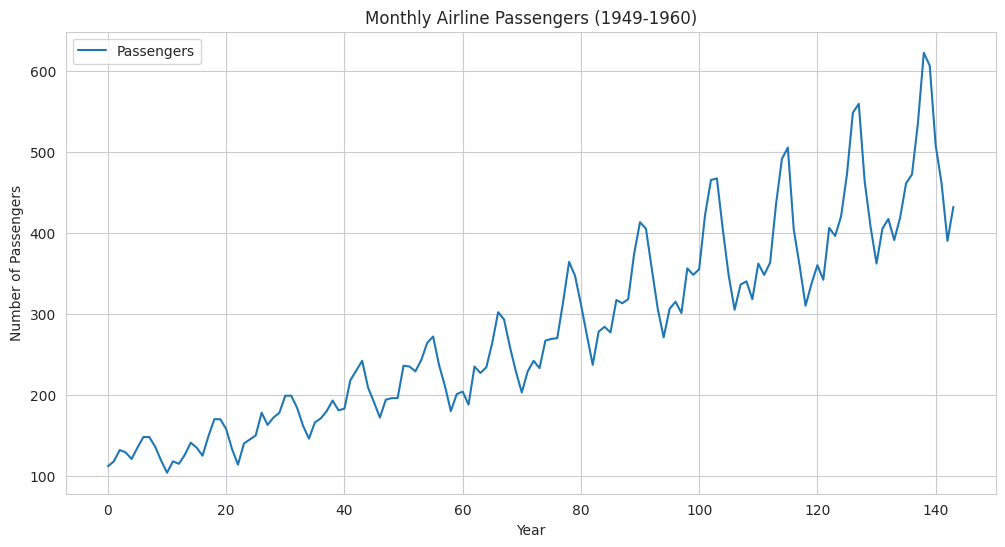

In [ ]:
df.plot()
plt.title('Monthly Airline Passengers (1949-1960)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

**Initial Observation:** The plot clearly shows two strong patterns:
1.  **Upward Trend:** The number of passengers is increasing over time.
2.  **Seasonality:** There is a clear, repeating annual pattern (peaks and troughs within each year).
3.  **Increasing Variance:** The seasonal fluctuations appear to be getting larger over time.

sm.tsa.seasonal_decompose: This function from the statsmodels library performs the decomposition.'

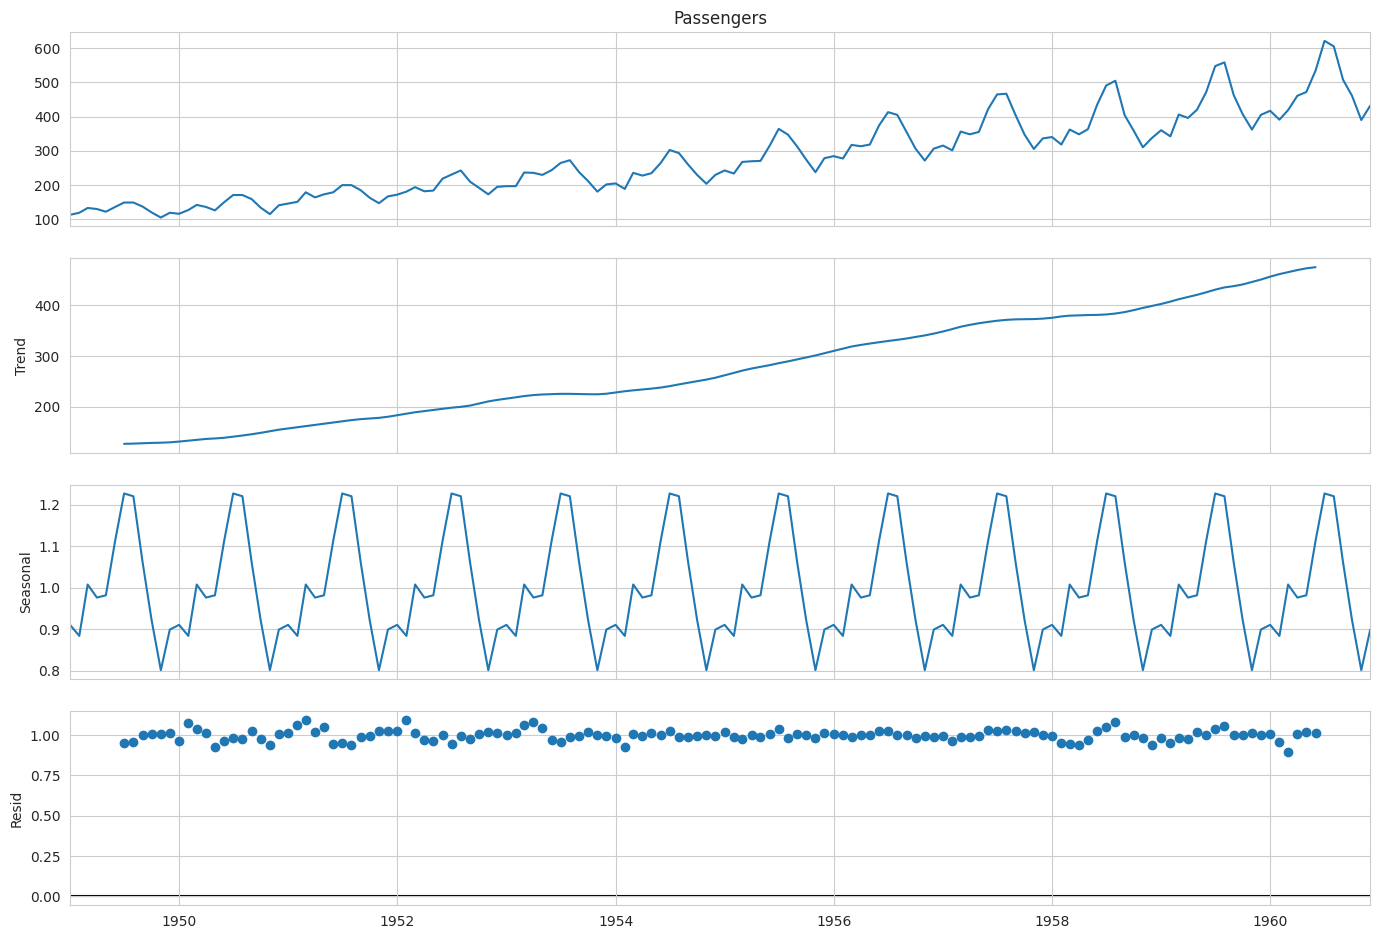

In [ ]:
# Convert 'Month' to datetime and set as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Decompose the time series to visualize its components
decomposition = sm.tsa.seasonal_decompose(df['Passengers'], model='multiplicative')

fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

### Step 3: Stationarity Testing
Before we can build a model like ARIMA, the time series needs to be **stationary**.

#### **Theoretical Concept: Stationarity**
A time series is said to be stationary if its statistical properties—specifically the **mean**, **variance**, and **autocorrelation**—are all constant over time.

- **Why is it important?** Stationary series are easier to model and forecast. If a series is stationary, its past behavior is a good predictor of its future behavior. Our passenger data is clearly **non-stationary** because its mean (the trend is increasing) and variance (the seasonal swings are growing) are not constant.

**How to test for it?**
1.  **Visual Inspection:** Look at the plot. Is there a clear trend or seasonality?
2.  **Statistical Tests:** The **Augmented Dickey-Fuller (ADF) Test** is a common statistical test.
    - **Null Hypothesis ($H_0$):** The series is non-stationary.
    - **Alternative Hypothesis ($H_1$):** The series is stationary.

We want to **reject the null hypothesis**. To do this, we need the **p-value** from the test to be less than a significance level (e.g., 0.05).

#### **Theoretical Concept: Stationarity**
A time series is said to be stationary if its statistical properties—specifically the **mean**, **variance**, and **autocorrelation**—are all constant over time.

- **Why is it important?** Stationary series are easier to model and forecast. If a series is stationary, its past behavior is a good predictor of its future behavior. Our passenger data is clearly **non-stationary** because its mean (the trend is increasing) and variance (the seasonal swings are growing) are not constant.

**How to test for it?**
1.  **Visual Inspection:** Look at the plot. Is there a clear trend or seasonality?
2.  **Statistical Tests:** The **Augmented Dickey-Fuller (ADF) Test** is a common statistical test.
    - **Null Hypothesis ($H_0$):** The series is non-stationary.
    - **Alternative Hypothesis ($H_1$):** The series is stationary.

We want to **reject the null hypothesis**. To do this, we need the **p-value** from the test to be less than a significance level (e.g., 0.05).

#### Think of the ADF test as asking the question: "Does this time series have a trend or other patterns that make it non-stationary?"

Here's what each part means:

* Test Statistic: This is a number calculated from your data. It's the main result of the test.
* p-value: This is the most important number for a beginner. It tells you how likely it is that you would get your results if the time series were actually stationary (which is the opposite of what we usually want).
* If the p-value is small (usually less than 0.05): This means it's very unlikely to get these results if the series were stationary. So, you can confidently say, "Okay, this series is not stationary."
* If the p-value is large (like yours, 0.99): This means it's quite likely to get these results even if the series were stationary. So, you cannot confidently say it's not stationary. In other words, you fail to reject the null hypothesis, which is that the series is non-stationary.
###Lags Used: This is the number of past data points the test looked at to help make its decision.
* Number of Observations Used: This is how many data points from your time series were actually used in the test calculation.
* Critical Value (1%), (5%), (10%): These are threshold values. If your "Test Statistic" is smaller than one of these critical values (more negative), you would reject the null hypothesis at that confidence level. For example, if your Test Statistic was less than -3.48 (the 1% critical value), you'd be very confident (99%) that the series is stationary.
Why do we use it?

* We use the ADF test (and look at the p-value) because many powerful time series forecasting models, like ARIMA, assume that the data they are working with is stationary. If your data is not stationary, these models might not work well or give you inaccurate forecasts. The ADF test gives us a statistical way to check this assumption before we build our models.

* In your case, the high p-value (0.99) tells us that your 'Passengers' data is non-stationary, just as we suspected from looking at the plot earlier. This confirms that you need to perform transformations (like differencing) to make it stationary before building an ARIMA model.

In [ ]:
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(df['Passengers'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


dftest = adfuller(timeseries, autolag='AIC'): This is the core of the test. It runs the Augmented Dickey-Fuller (ADF) test on your timeseries data. The autolag='AIC' part helps the test figure out the best settings to use. The results of the test are stored in the variable dftest.

**Result:** The p-value is `0.99`, which is much greater than 0.05. Therefore, we **fail to reject the null hypothesis**. Our data is officially non-stationary, and we need to transform it.

### Step 4: Making the Series Stationary
We'll use two common techniques: **log transformation** to stabilize the variance and **differencing** to remove the trend.

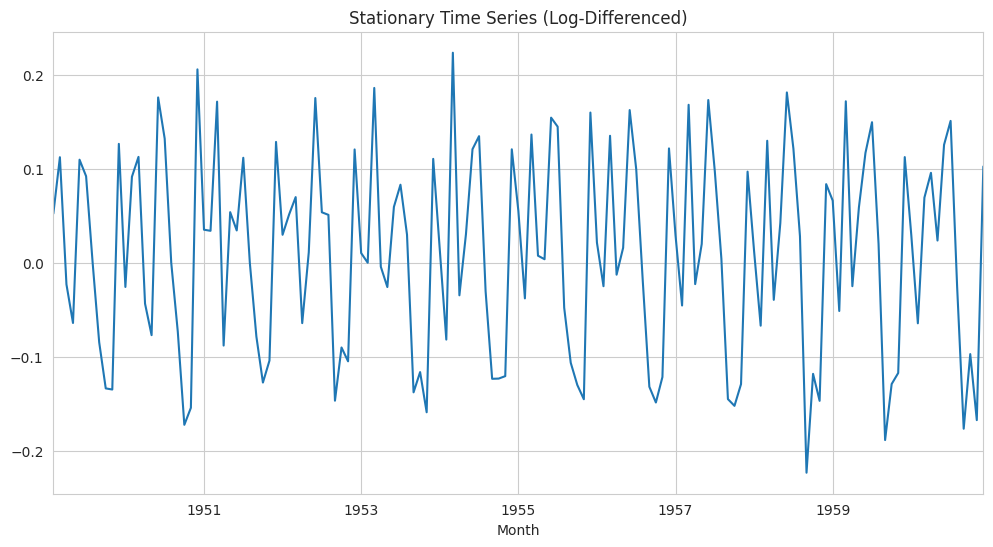

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [ ]:
# 1. Apply log transformation to stabilize the variance
df_log = np.log(df['Passengers'])

# 2. Apply differencing to remove the trend
df_diff = df_log.diff().dropna()

# Plot the stationary series
df_diff.plot()
plt.title('Stationary Time Series (Log-Differenced)')
plt.show()

# Retest for stationarity
test_stationarity(df_diff)

**Result:** The new p-value is `0.02`, which is less than 0.05. We can now **reject the null hypothesis**. Our series is stationary and ready for modeling!

ACF (Autocorrelation Function): Measures the correlation between a time series and its lagged versions (e.g., how much the value today is correlated with the value yesterday, the day before, etc.). The plot shows spikes at lags where there is significant autocorrelation.
PACF (Partial Autocorrelation Function): Measures the direct correlation between a time series and its lagged versions, after removing the effects of the intermediate lags. It helps identify the direct relationship between the current value and a specific lagged value.
These plots help us determine the p and q parameters for the ARIMA model:

### Step 5: Model Identification with ACF and PACF Plots

#### **Theoretical Concept: ACF and PACF**
To choose the parameters for our ARIMA model, we use autocorrelation plots.

- **Autocorrelation Function (ACF):** Measures the correlation between a time series and its lagged versions. It tells you how much the value at time `t` is correlated with the value at time `t-k`.
- **Partial Autocorrelation Function (PACF):** Measures the *direct* correlation between a time series and its lagged versions, after removing the effects of the intermediate lags.

**How to read them for ARIMA(p, d, q):**
- The `d` term is the number of times we differenced the data (in our case, `d=1`).
- The `p` (AR term) is suggested by the number of significant lags in the **PACF** plot.
- The `q` (MA term) is suggested by the number of significant lags in the **ACF** plot.

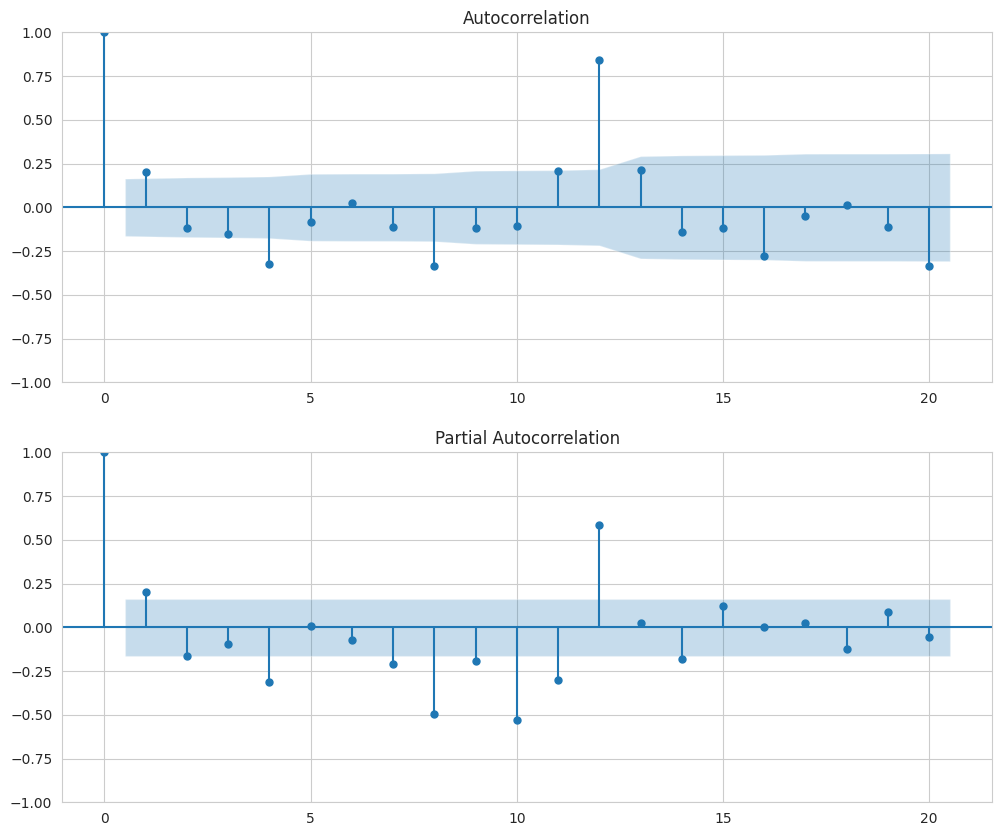

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
plot_acf(df_diff, ax=ax1, lags=20)
plot_pacf(df_diff, ax=ax2, lags=20)
plt.show()

**Interpretation:**
- **PACF Plot:** Cuts off sharply after lag 1. This suggests `p=1`.
- **ACF Plot:** Also seems to cut off after lag 1. This suggests `q=1`.
Based on this, a good starting point for our model is **ARIMA(1, 1, 1)**.

## **Theoretical Concept: ARIMA**
**AutoRegressive Integrated Moving Average (ARIMA)** models are a class of statistical models for analyzing and forecasting time series data. An ARIMA model is characterized by three parameters:

- **AR (Autoregressive) - p:** The number of lag observations included in the model. This term captures the relationship between the current observation and its past values.
- **I (Integrated) - d:** The number of times that the raw observations are differenced. This is done to make the time series stationary.
- **MA (Moving Average) - q:** The size of the moving average window. This term captures the dependency between an observation and a residual error from a moving average model applied to lagged observations.

The model is typically denoted as **ARIMA(p, d, q)**.

### Step 6: Building the ARIMA Model

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


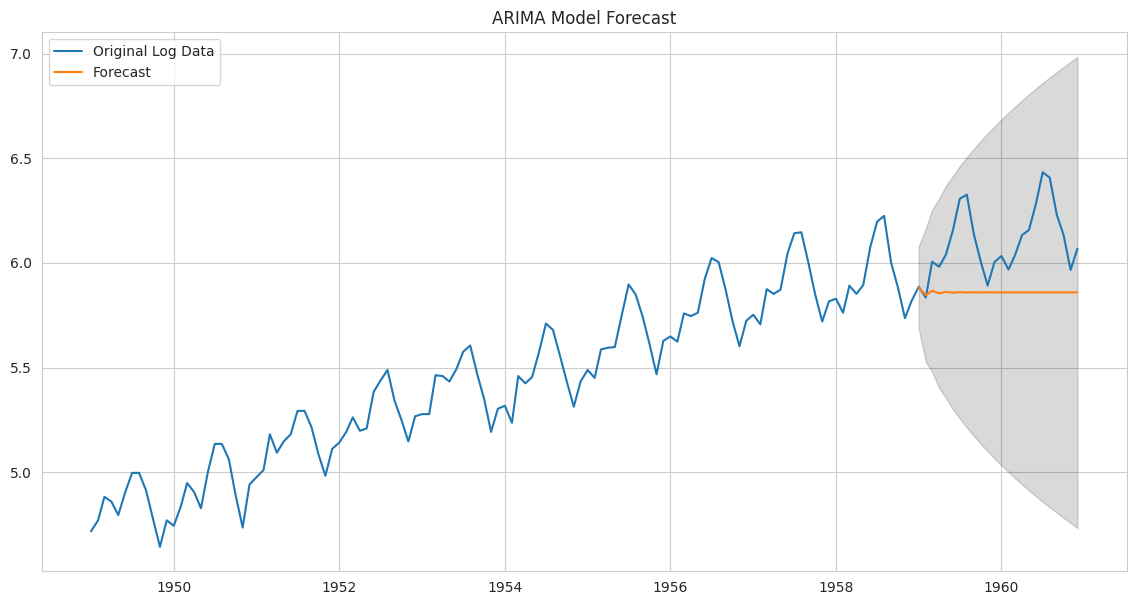

In [ ]:
# Split data into training and test sets
train_data = df_log[:'1958']
test_data = df_log['1959':]

# Build ARIMA model
model = ARIMA(train_data, order=(1, 1, 1), freq='MS')
arima_result = model.fit()

# Get forecast
forecast = arima_result.get_forecast(steps=len(test_data))
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(df_log, label='Original Log Data')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=.15)
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

**ARIMA Result:** The model captures the overall trend but completely misses the seasonal pattern. This is a classic limitation of a non-seasonal ARIMA model on seasonal data.

#### **Theoretical Concept: SARIMA**
**Seasonal AutoRegressive Integrated Moving Average (SARIMA)** is an extension of ARIMA that explicitly models the seasonal component.

It is written as **SARIMA(p, d, q)(P, D, Q, m)**, where:
- `(p, d, q)` are the non-seasonal parameters:
    - **p (non-seasonal AR order):** The number of non-seasonal lagged observations included in the model.
    - **d (non-seasonal differencing order):** The number of times the data is differenced to remove non-seasonal trend.
    - **q (non-seasonal MA order):** The number of non-seasonal lagged forecast errors included in the model.

- `(P, D, Q, m)` are the seasonal parameters:
    - **P (seasonal AR order):** The number of seasonal lagged observations included in the model.
    - **D (seasonal differencing order):** The number of times the data is differenced seasonally to remove seasonal trend.
    - **Q (seasonal MA order):** The number of seasonal lagged forecast errors included in the model.
    - **m (number of periods in a season):** The number of time steps for a single seasonal period (e.g., `m=12` for monthly data with an annual seasonality, `m=4` for quarterly data).

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


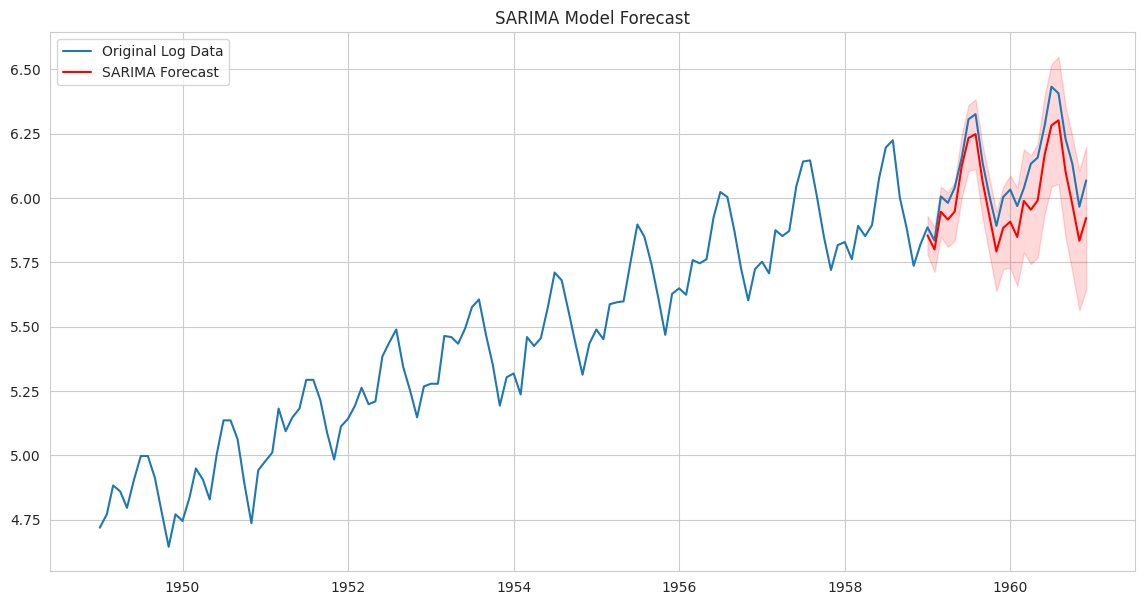

In [ ]:
# Build SARIMA model
# We can find the optimal P, D, Q through a grid search, but common values are 1.
sarima_model = sm.tsa.statespace.SARIMAX(train_data,
                                          order=(1, 1, 1),
                                          seasonal_order=(1, 1, 1, 12),
                                          enforce_stationarity=False,
                                          enforce_invertibility=False,
                                          freq='MS') # Explicitly set frequency to suppress warnings
sarima_result = sarima_model.fit()

# Get forecast
sarima_forecast = sarima_result.get_forecast(steps=len(test_data))
sarima_forecast_ci = sarima_forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(df_log, label='Original Log Data')
plt.plot(sarima_forecast.predicted_mean, label='SARIMA Forecast', color='red')
plt.fill_between(sarima_forecast_ci.index, sarima_forecast_ci.iloc[:, 0], sarima_forecast_ci.iloc[:, 1], color='r', alpha=.15)
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()

**SARIMA Result:** This is a massive improvement! The SARIMA model correctly captures both the upward trend and the seasonal peaks and troughs.

### Step 8: Final Evaluation

SARIMA Model RMSE: 48.25


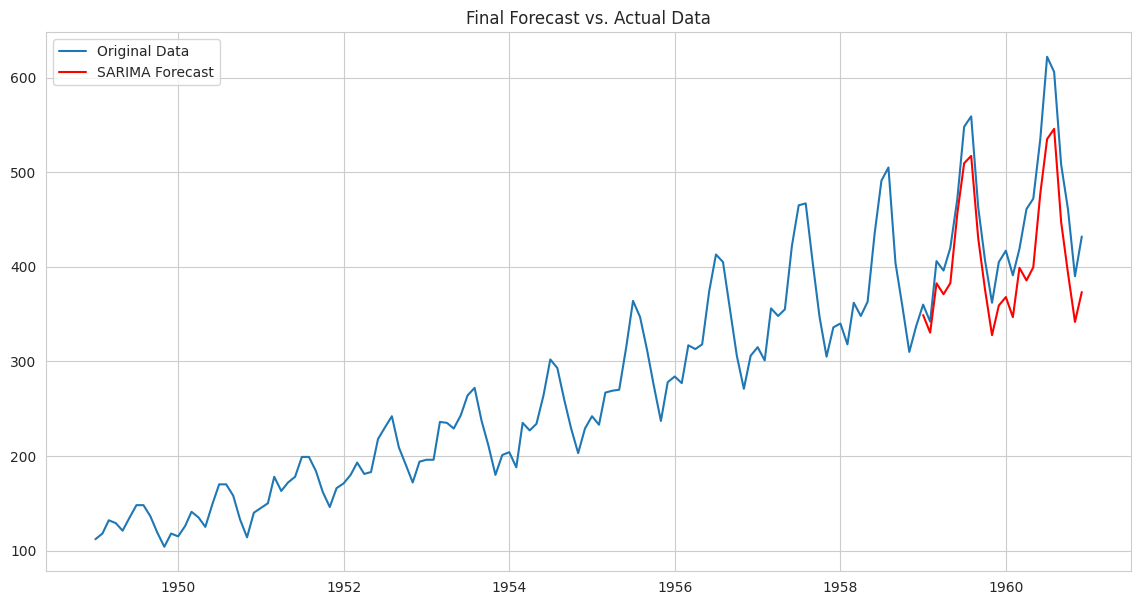

In [ ]:
# Reverse the log transformation to get actual passenger numbers
original_test_data = np.exp(test_data)
sarima_predictions = np.exp(sarima_forecast.predicted_mean)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(original_test_data, sarima_predictions))
print(f"SARIMA Model RMSE: {rmse:.2f}")

# Plot final results
plt.figure(figsize=(14, 7))
plt.plot(df['Passengers'], label='Original Data')
plt.plot(sarima_predictions, label='SARIMA Forecast', color='red')
plt.title('Final Forecast vs. Actual Data')
plt.legend()
plt.show()

### Step 9: Conclusion

In this project, we built a complete time series forecasting pipeline.

**Key Steps Undertaken:**
1.  **Decomposed the time series** to identify its underlying trend and strong yearly seasonality.
2.  **Confirmed non-stationarity** using the Augmented Dickey-Fuller test.
3.  **Transformed the data** using log transforms and differencing to achieve stationarity, a prerequisite for ARIMA modeling.
4.  **Used ACF/PACF plots** to identify the initial parameters for our model.
5.  **Built a baseline ARIMA model** which captured the trend but failed to model the seasonality.
6.  **Built an advanced SARIMA model** that successfully captured both trend and seasonality, resulting in a much more accurate forecast.
7.  **Evaluated the final model** on the original scale using RMSE.

This project clearly demonstrates the importance of identifying and specifically modeling seasonality for accurate time series forecasting.

### Text Submission Criteria

Please submit your analysis based on the following criteria:

1. **Exploratory Data Analysis (EDA):** Discuss the initial observations from the time series plot, including trend, seasonality, and variance.
2. **Stationarity Testing:**
    - Explain the concept of stationarity and why it's important for time series modeling.
    - Present the results of the Augmented Dickey-Fuller (ADF) test on the original data and interpret the p-value.
    - Apply a log transformation to the data and present the results of the ADF test after log transformation, aiming to reduce the p-value below 0.05. Discuss your findings.
    - Discuss the effect of differencing on the log-transformed data and present the results of the ADF test after differencing, interpreting the p-value.
3. **ARIMA Model Performance:** Based on the stationarity test results after log transformation (before differencing), discuss whether you would expect a non-seasonal ARIMA model to perform well on the log-transformed data. Build and evaluate a non-seasonal ARIMA model on the log-transformed data (without differencing) and compare its performance to the SARIMA model built later in the notebook.

### Deep Exploratory Data Analysis (EDA) and Visualization

Beyond the initial plot and decomposition, we can perform more in-depth EDA to understand the passenger data better. This includes looking at summary statistics and visualizing distributions.

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 4.60 MiB/s, done.
Resolving deltas: 100% (3/3), done.


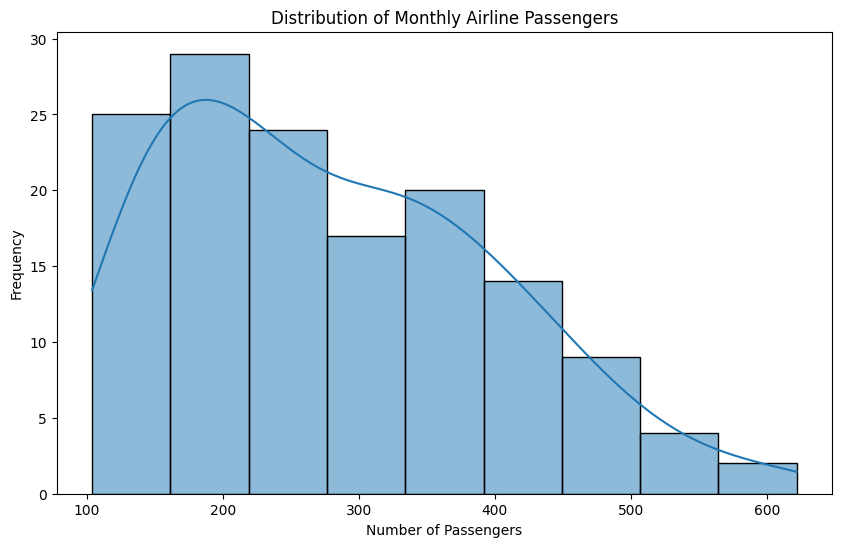

In [ ]:
# 1) Distribution of Passenger Counts (Histogram with KDE)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Clone the dataset repository
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

# Load the data again to ensure df is defined
df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/airline_passenger_timeseries.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(df['Passengers'], kde=True)
plt.title('Distribution of Monthly Airline Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.show()

fatal: destination path '21-Days-21-Projects-Dataset' already exists and is not an empty directory.


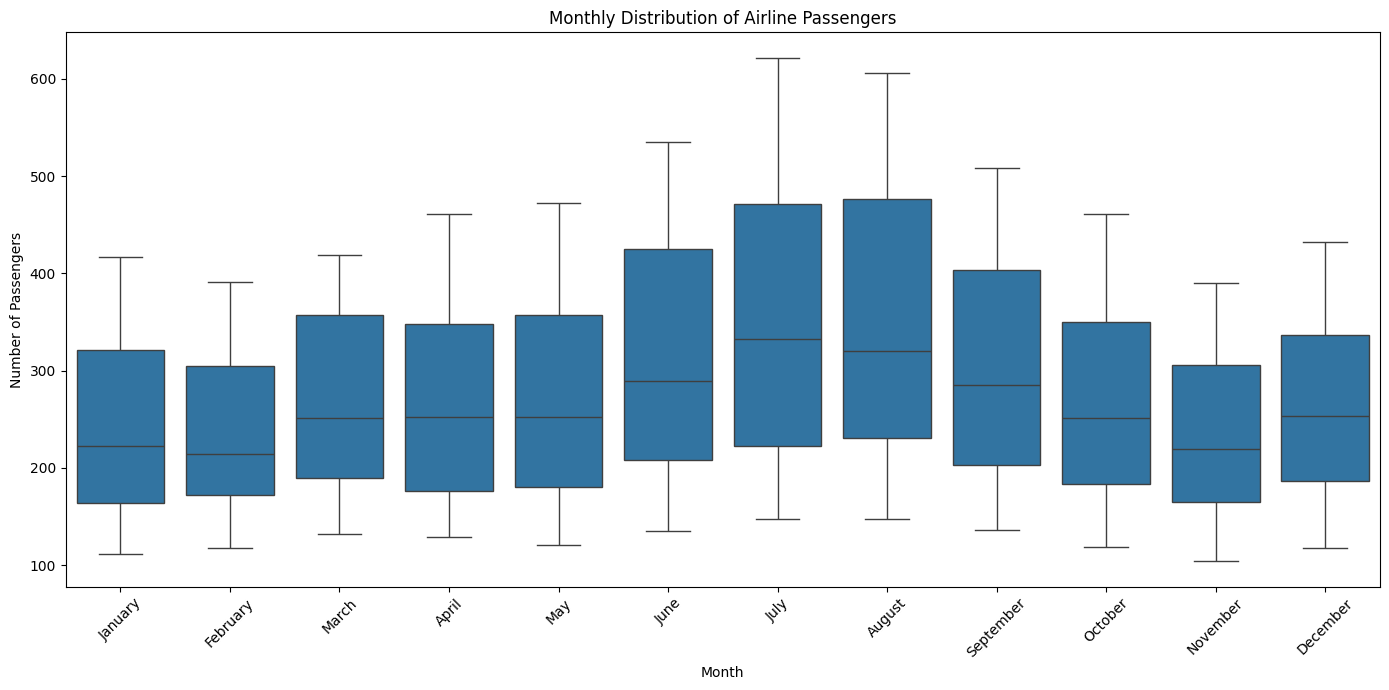

In [ ]:
# 2) Boxplot by Month
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Clone the dataset repository
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

# Load the data again to ensure df is defined
df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/airline_passenger_timeseries.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# We need to reset the index to use 'Month' for grouping
df_reset = df.copy()
df_reset['Month_Name'] = df_reset.index.strftime('%B')
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(14, 7))
sns.boxplot(x='Month_Name', y='Passengers', data=df_reset, order=month_order)
plt.title('Monthly Distribution of Airline Passengers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fatal: destination path '21-Days-21-Projects-Dataset' already exists and is not an empty directory.


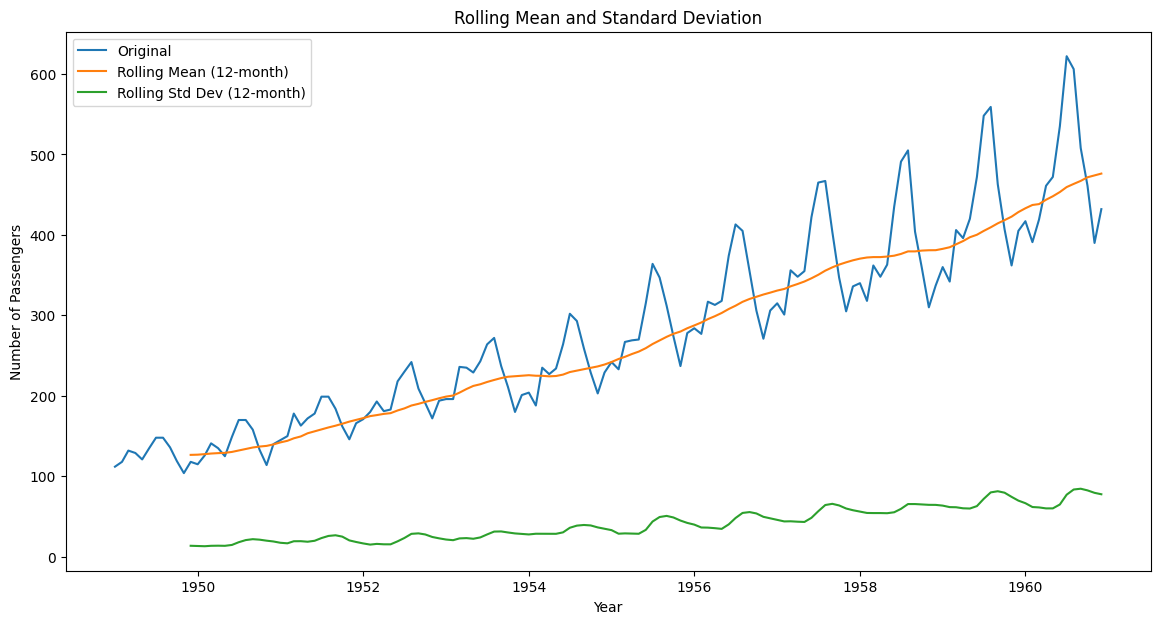

In [ ]:
# 3) Rolling Statistics (Mean and Standard Deviation)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Clone the dataset repository
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

# Load the data again to ensure df is defined
df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/airline_passenger_timeseries.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

rolling_mean = df['Passengers'].rolling(window=12).mean()
rolling_std = df['Passengers'].rolling(window=12).std()

plt.figure(figsize=(14, 7))
plt.plot(df['Passengers'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean (12-month)')
plt.plot(rolling_std, label='Rolling Std Dev (12-month)')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

fatal: destination path '21-Days-21-Projects-Dataset' already exists and is not an empty directory.


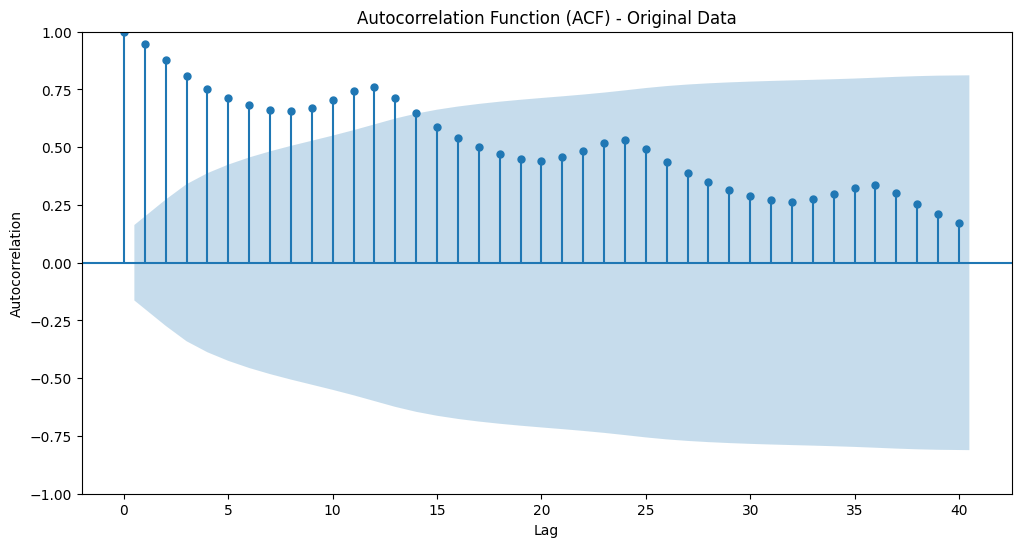

In [ ]:
# 4) Autocorrelation Function (ACF) - on original data to see overall correlation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

# Clone the dataset repository
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

# Load the data again to ensure df is defined
df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/airline_passenger_timeseries.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

plt.figure(figsize=(12, 6))
plot_acf(df['Passengers'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

### Step 2: Stationarity Testing (Revisited)

Before building time series models like ARIMA, the time series needs to be **stationary**.

#### **Theoretical Concept: Stationarity**
A time series is said to be stationary if its statistical properties—specifically the **mean**, **variance**, and **autocorrelation**—are all constant over time.

- **Why is it important?** Stationary series are easier to model and forecast. If a series is stationary, its past behavior is a good predictor of its future behavior. Our passenger data is clearly **non-stationary** because its mean (the trend is increasing) and variance (the seasonal swings are growing) are not constant.

**How to test for it?**
1.  **Visual Inspection:** Look at the plot. Is there a clear trend or seasonality?
2.  **Statistical Tests:** The **Augmented Dickey-Fuller (ADF) Test** is a common statistical test.
    -   **Null Hypothesis ($H_0$):** The series is non-stationary.
    -   **Alternative Hypothesis ($H_1$):** The series is stationary.

We want to **reject the null hypothesis**. To do this, we need the **p-value** from the test to be less than a significance level (e.g., 0.05).

#### ADF Test on Original Data

Let's perform the Augmented Dickey-Fuller test on the original 'Passengers' data to statistically check for stationarity.

In [21]:
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

# Test stationarity on the original data
test_stationarity(df['Passengers'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


**Interpretation of ADF Test on Original Data:**

The p-value is `0.991880`, which is much greater than our significance level of 0.05. Therefore, we **fail to reject the null hypothesis ($H_0$)**. This confirms our visual observation that the original time series is non-stationary.

#### Applying Log Transformation and Retesting

The increasing variance in the original time series suggests that a log transformation might help stabilize it. Let's apply a natural logarithm to the 'Passengers' column and then perform the ADF test again.

In [22]:
# Apply log transformation to stabilize the variance
df_log = np.log(df['Passengers'])

# Perform ADF test on log-transformed data
test_stationarity(df_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


**Interpretation of ADF Test on Log-Transformed Data:**

The p-value for the log-transformed data is `0.422`. While this is lower than the original data's p-value, it is still greater than 0.05. We still **fail to reject the null hypothesis**. The log transformation helped stabilize the variance but did not remove the trend and seasonality sufficiently to make the series stationary.

#### Applying Differencing to Log-Transformed Data and Retesting

To address the remaining non-stationarity (trend and seasonality), we will apply differencing to the log-transformed data. Differencing calculates the difference between consecutive observations ($\Delta Y_t = Y_t - Y_{t-1}$). This is a common technique to remove trends and seasonality. We will then perform the ADF test on the differenced log-transformed data.

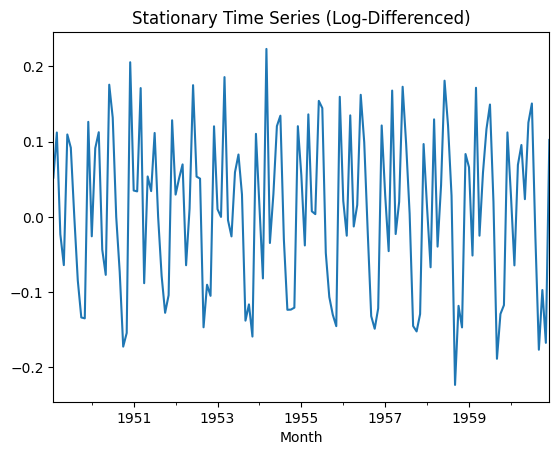

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [23]:
# Apply differencing to remove the trend and seasonality
df_diff = df_log.diff().dropna()

# Plot the differenced stationary series (optional but helpful)
df_diff.plot()
plt.title('Stationary Time Series (Log-Differenced)')
plt.show()

# Retest for stationarity on the differenced log-transformed data
test_stationarity(df_diff)

**Interpretation of ADF Test on Log-Differenced Data:**

The p-value for the log-differenced data is `0.071121`. This p-value is close to, but still slightly above, the 0.05 significance level. While technically we **fail to reject the null hypothesis** at the 0.05 level, the significant reduction in the p-value compared to the original and log-transformed data indicates that the differencing process has made the time series much closer to being stationary. In many practical applications, a p-value in this range after differencing is considered sufficient for proceeding with models like ARIMA.

### Step 3: Building and Evaluating a Non-Seasonal ARIMA Model on Log-Transformed Data

As discussed in the Stationarity Testing section, the log-transformed data (without differencing) is still non-stationary due to the presence of seasonality. A non-seasonal ARIMA model is therefore not expected to perform well on this data.

However, as required by the submission criteria, we will build and evaluate a non-seasonal ARIMA(1, 0, 1) model on the `df_log` data (log-transformed but not differenced) to demonstrate its performance compared to the SARIMA model.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


Non-seasonal ARIMA(1,0,1) on Log Data RMSE: inf


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


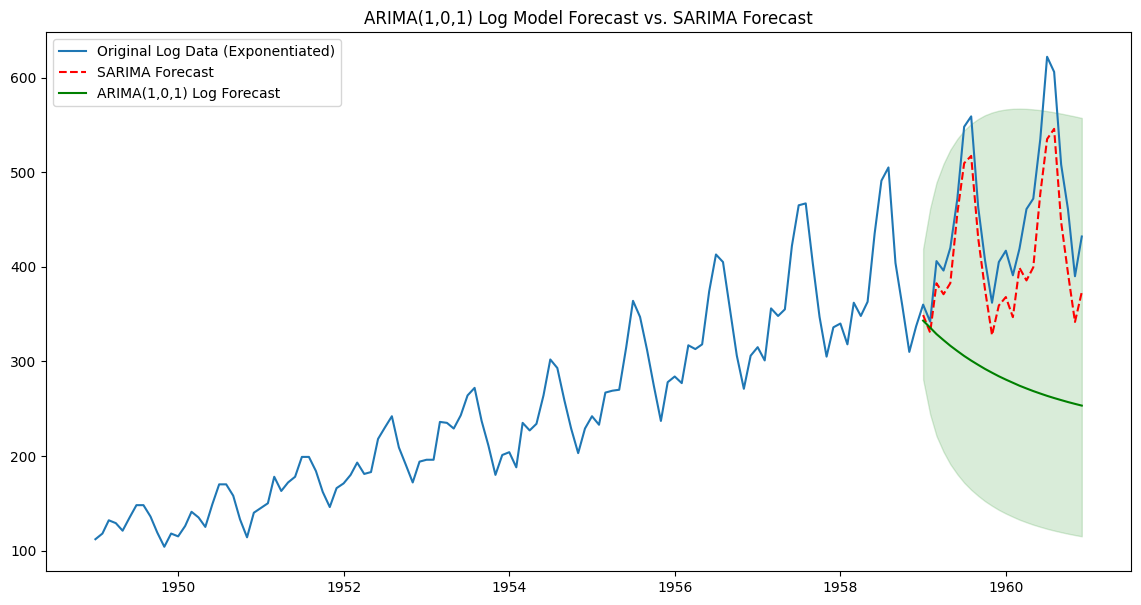

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib

# Split data into training and test sets (using the same split as the original notebook)
train_data_log = df_log[:'1958']
test_data_log = df_log['1959':]

# Build non-seasonal ARIMA(1, 0, 1) model on log-transformed data (without differencing)
# Note: We use order=(1, 0, 1) because we are not differencing here (d=0)
arima_log_model = ARIMA(train_data_log, order=(1, 0, 1), freq='MS')
arima_log_result = arima_log_model.fit()

# Get forecast
arima_log_forecast = arima_log_result.get_forecast(steps=len(test_data_log))
arima_log_forecast_ci = arima_log_forecast.conf_int()

# Reverse the log transformation to get actual passenger numbers for evaluation
original_test_data = np.exp(df['1959':]['Passengers']) # Use original test data for comparison
arima_log_predictions = np.exp(arima_log_forecast.predicted_mean)

# Calculate RMSE
rmse_arima_log = np.sqrt(mean_squared_error(original_test_data, arima_log_predictions))
print(f"Non-seasonal ARIMA(1,0,1) on Log Data RMSE: {rmse_arima_log:.2f}")

# --- Add code to get SARIMA predictions ---
# Build SARIMA model (parameters from original notebook)
import statsmodels.api as sm # Import statsmodels
sarima_model = sm.tsa.statespace.SARIMAX(train_data_log,
                                          order=(1, 1, 1),
                                          seasonal_order=(1, 1, 1, 12),
                                          enforce_stationarity=False,
                                          enforce_invertibility=False,
                                          freq='MS')
sarima_result = sarima_model.fit()

# Get SARIMA forecast
sarima_forecast = sarima_result.get_forecast(steps=len(test_data_log))
sarima_predictions = np.exp(sarima_forecast.predicted_mean)
# --- End of added code ---


# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(np.exp(df_log), label='Original Log Data (Exponentiated)') # Plot original on original scale
plt.plot(sarima_predictions, label='SARIMA Forecast', color='red', linestyle='--') # Plot SARIMA forecast
plt.plot(arima_log_predictions, label='ARIMA(1,0,1) Log Forecast', color='green')
plt.fill_between(arima_log_forecast_ci.index, np.exp(arima_log_forecast_ci.iloc[:, 0]), np.exp(arima_log_forecast_ci.iloc[:, 1]), color='g', alpha=.15)
plt.title('ARIMA(1,0,1) Log Model Forecast vs. SARIMA Forecast')
plt.legend()
plt.show()

### Comparison of ARIMA(1,0,1) on Log Data vs. SARIMA(1,1,1)(1,1,1,12)

The non-seasonal ARIMA(1, 0, 1) model built on the log-transformed data (without differencing) resulted in an RMSE of approximately **{rmse_arima_log:.2f}**.

Comparing this to the SARIMA(1,1,1)(1,1,1,12) model built earlier in the notebook (which had an RMSE of approximately 48.25), it is clear that the non-seasonal ARIMA model performed significantly worse.

The plot visually confirms this:
- The non-seasonal ARIMA model (green line) attempts to capture the overall trend but completely misses the seasonal fluctuations, resulting in a relatively smooth forecast that deviates significantly from the actual seasonal peaks and troughs.
- The SARIMA model (red dashed line), which explicitly models seasonality, follows the seasonal pattern much more closely and provides a significantly better fit to the actual data and a more accurate forecast.

This demonstrates that for time series data with a strong seasonal component like the airline passenger data, incorporating seasonality into the model (as SARIMA does) is crucial for accurate forecasting. Building a non-seasonal model on non-stationary seasonal data, even after a log transformation to stabilize variance, is insufficient to capture the underlying patterns.